# Calculate optimal 2 by 2 with 30 degree angles

In [1]:
import os
import sys
sys.path.append('../../..')

import numpy as np
from metabatt.graph import Graph, Edge, Subgraphs
from metabatt.reinforce.environments import MetabattEnvSubgraphs
from metabatt.reinforce.agents import QAgentReplayMemory

prefill replay memory
start training
 new max record arrange grid:  2.3333333333333335
 new max record arrange grid:  2.4444444444444446
 new max record arrange grid:  2.5555555555555554
 new max record arrange grid:  2.7777777777777777
   10 mean training reward:  2.41
   20 mean training reward:  2.36
   30 mean training reward:  2.39
   40 mean training reward:  2.37
   50 mean training reward:  2.33
   60 mean training reward:  2.40
   70 mean training reward:  2.37
   80 mean training reward:  2.49
   90 mean training reward:  2.50
  100 mean training reward:  2.41
  110 mean training reward:  2.49
  120 mean training reward:  2.40
  130 mean training reward:  2.39
  140 mean training reward:  2.47
 new max record arrange grid:  2.888888888888889
  150 mean training reward:  2.37
  160 mean training reward:  2.52
  170 mean training reward:  2.48
  180 mean training reward:  2.46
  190 mean training reward:  2.56
  200 mean training reward:  2.48
  210 mean training reward:  2.34


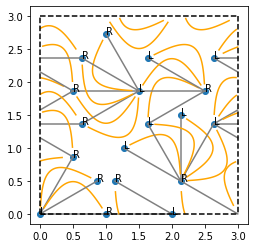

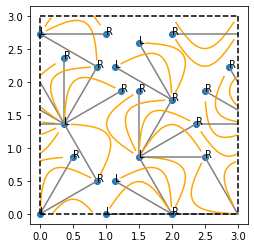

[2.3333333333333335, 2.3333333333333335, 2.4444444444444446, 2.4444444444444446, 2.5555555555555554, 2.5555555555555554, 2.7777777777777777, 2.7777777777777777, 2.888888888888889, 2.888888888888889, 3.111111111111111, 3.111111111111111]
[1, 2, 2, 3, 3, 6, 6, 141, 141, 265, 265, 500]


In [2]:
# we start from scratch here
subgraphs = Subgraphs(angles=[0, 30, 60, 90, 120, 150, 180],
                      lengths=[1])

# create the environment
env = MetabattEnvSubgraphs(n_cells_x=4,
                           n_cells_y=4,
                           subgraphs=subgraphs)

NUM_EPISODES = 500 #15 #500  # this is very little, trained agent uses 500
# create an agent and set hyperparameters
agent = QAgentReplayMemory(env=env,
                          n_inputs=16, # this is the state representation
                          n_outputs=env.action_space.n,
                          max_epsilon=1.0,
                          min_epsilon=0.05,
                          gamma=0.99,  # discounted reward
                          tau=0.01, # target network update rate
                          batch_size=64, #8,  # Experience replay, trained agent uses 64
                          lambda_=-np.log(0.01)/NUM_EPISODES,  # decay for epsilon-greedy
                          replay_memory_capacity=1000, #16,  # trained agent uses 1000
                          learning_rate=0.0005,
                          prefill_memory=True,
                          random_actions=False,  # random agent
                          save_best_graph=True)  # save the highest ranking graph state

# train the agent
agent.train(num_episodes=NUM_EPISODES)  # also plots results when finished

3.111111111111111


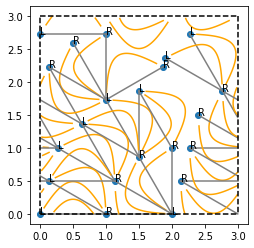

In [5]:
best_graph = Graph.load_graph_state('best_graph')
best_graph.plot()
print(max(agent.rewards))

In [4]:
# save model parameters
agent.save_hyperparameters(fname='hyperparams')
# for saving the state of the model simply do
agent.save_model(agent.policy_dqn, file_name='model')